In [1]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np
from NowcastingEco import NowcastingEco
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')

/var/folders/4q/7w99lfvx0cl74dtmhv3y6gfc0000gn/T/ipykernel_99580/3408424076.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')


In [3]:
crash_test = NowcastingEco(df)
crash_test.clean_data() # Egypt/KSA/UAE

/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.date = self.df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.tone = self.df.tone.apply(lambda x: self.convert_into_list(x))
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:83: SettingWithCopyWarning: 
A va

,gkgrecordid,date,subsourcecommonname,tone,extrasxml,translationinfo,cleaned_locations,cleaned_url,cleaned_themes
0,20151011213000-456,2015-10-11 21:30:00,dailynewsegypt.com,"[1.76991150442478, 2.54424778761062, 0.7743362...",NaN,NaN,"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[tgm, markets, sqm, for, cleopatra, real, esta...","[ECON, WORLDCURRENCIES, DOLLAR, ECON, WORLDCUR..."
4,20151011150000-503,2015-10-11 15:00:00,dailynewsegypt.com,"[-9.05730129390018, 0.924214417744917, 9.98151...",NaN,NaN,"[Egypt, Egypt, Egypt, Egypt, Egypt]","[sharp, decline, in, reported, terrorist, atta...","[KIDNAP, EXTREMISM, BORDER, TAX, RELIGION, MUS..."
10,20151017171500-1106,2015-10-17 17:15:00,daytondailynews.com,"[-2.88753799392097, 1.97568389057751, 4.863221...",NaN,NaN,"[Egyptians, Egyptians, Egyptians, Egyptians, E...",[],"[GENERAL, GOVERNMENT, GENERAL, GOVERNMENT, GEN..."
12,20151017104500-173,2015-10-17 10:45:00,appeal-democrat.com,"[-4.8, 0, 4.8, 4.8, 20.8, 0, 204]",NaN,NaN,"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[voting, begins, in, egypt, s, parliamentary, ...","[TAX, FNCACT, CANDIDATE, TAX, FNCACT, CANDIDAT..."
13,20151017104500-276,2015-10-17 10:45:00,thepublicopinion.com,"[-4.07124681933842, 0, 4.07124681933842, 4.071...",NaN,NaN,"[Egypt, Egypt, Egypt, Egypt, Egyptians, Egypt,...","[voting, begins, in, egypt, s, parliamentary, ...","[TAX, FNCACT, CANDIDATES, TAX, FNCACT, CANDIDA..."
...,...,...,...,...,...,...,...,...,...
773782,20230302204500-1653,2023-03-02 20:45:00,kawc.org,"[-0.975609756097561, 2.19512195121951, 3.17073...",<PAGE_ALTURL_AMP>https://www.kawc.org/npr-news...,NaN,"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[a, scan, discovers, a, sealed, foot, long, ha...","[EDUCATION, TAX, FNCACT, PROFESSOR, EPU, POLIC..."
773803,20230303171500-1532,2023-03-03 17:15:00,thedickinsonpress.com,"[0.648648648648649, 4, 3.35135135135135, 7.351...",<PAGE_LINKS>https://sdlegislature.gov/Session/...,NaN,[Egypt],"[south, dakota, controversial, changes, to, no...","[TAX, FNCACT, CANDIDATES, TAX, FNCACT, CANDIDA..."
773812,20230307234500-628,2023-03-07 23:45:00,china.org.cn,"[-10.1769911504425, 0.884955752212389, 11.0619...",<PAGE_LINKS>http://www.adobe.com/cn/products/f...,NaN,"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...",[],"[GENERAL, HEALTH, MEDICAL, CRISISLEX, C04, LOG..."
773835,20230301120000-384,2023-03-01 12:00:00,businesstraveller.com,"[0.374531835205993, 0.374531835205993, 0, 0.37...",<PAGE_TITLE>Egyptair becomes first African car...,NaN,"[Egypt, Egypt, Egypt]","[egyptair, becomes, first, african, carrier, t...","[LEASING, USPEC, POLICY1, EPU, ECONOMY, EPU, E..."


Date
2014    2237.750000
2015    1779.083333
2016    2122.333333
2017    2109.508333
2018    2302.000000
2019    2416.083333
2020    2219.166667
2021    3635.517500
2022    4031.272727
Name: Value, dtype: float64
date
2015   -1.502215
2016   -1.963612
2017   -1.746214
2018   -1.082667
2019   -0.326479
2020   -1.232204
2021   -0.923631
2022    0.427822
2023    0.589617
Name: mean_tone, dtype: float64


/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['mean_tone'] = self.df.tone.apply(lambda x: x[0])
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['binary_tone'] = self.df.tone.apply(lambda x: 1 if x[1] > x[2] else 0)


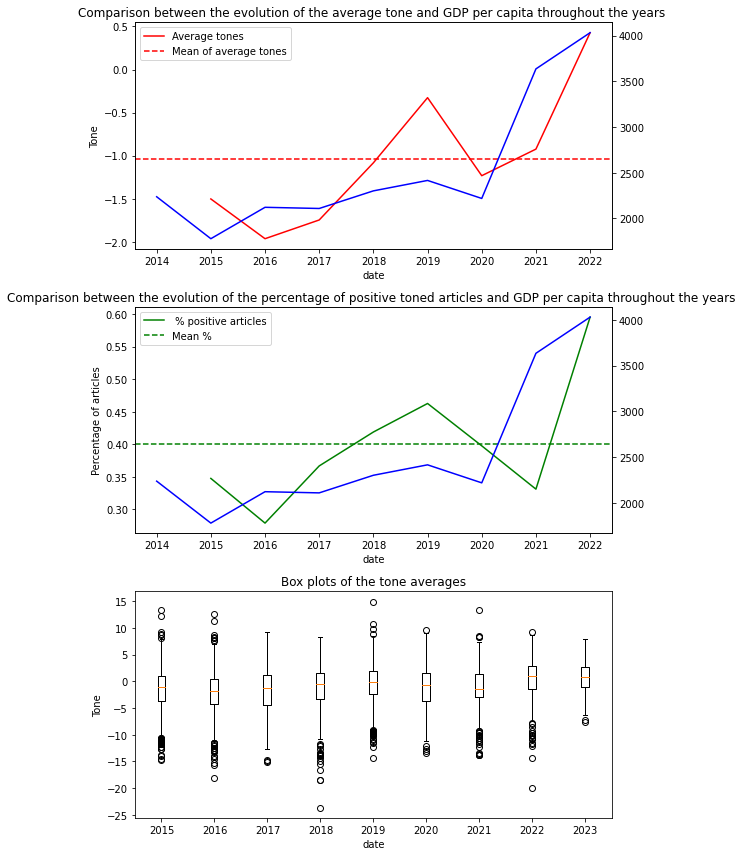

Number of articles per year for the filtered country and theme:  date
2015    1956
2016    2659
2017    1802
2018    1442
2019    1299
2020     767
2021    1087
2022     803
2023     157
Name: cleaned_themes, dtype: int64


In [4]:
crash_test.tone_analysis(indicator=True) #CONSUMPTION/TRADE/EMPLOYMENT